# Assignment 5 - CNN (Convolutional Neural Networks)
## Zuzanna Ejsymont

Objective of the project is to train a model using CNN, to recognise if a person on the image is wearing a mask or not.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import os

In [2]:
img = image.load_img('C:/Users/LENOVO/Desktop/Image_Recognition/train/mask/1.jpg')

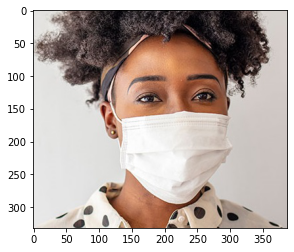

In [3]:
plt.imshow(img)

In [4]:
train = ImageDataGenerator(rescale = 1/255) 
validation = ImageDataGenerator(rescale = 1/255)

In [5]:
train_dataset = train.flow_from_directory('C:/Users/LENOVO/Desktop/Image_Recognition/train/', target_size = (200,200), batch_size = 3, class_mode = 'binary')

Found 40 images belonging to 2 classes.


In [6]:
train_dataset.class_indices

{'mask': 0, 'no_mask': 1}

In [7]:
validation_dataset = validation.flow_from_directory('C:/Users/LENOVO/Desktop/Image_Recognition/validation/', target_size = (200,200), batch_size = 3, class_mode = 'binary')

Found 10 images belonging to 2 classes.


In [8]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (200,200,3)), 
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (200,200,3)), 
                                    tf.keras.layers.MaxPool2D(2,2), 
                                    
                                    tf.keras.layers.Flatten(),
                                    
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')

                                   ])

In [9]:
model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])
              

In [10]:
model_fit = model.fit(train_dataset, steps_per_epoch = 3, epochs = 20, validation_data = validation_dataset)

Epoch 1/20
3/3 [==============================] - 6s 1s/step - loss: 5.9861 - accuracy: 0.4444 - val_loss: 0.7596 - val_accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 3s 920ms/step - loss: 0.8327 - accuracy: 0.4286 - val_loss: 0.5833 - val_accuracy: 0.7000
Epoch 3/20
3/3 [==============================] - 2s 587ms/step - loss: 1.0053 - accuracy: 0.5556 - val_loss: 0.6507 - val_accuracy: 0.5000
Epoch 4/20
3/3 [==============================] - 1s 454ms/step - loss: 0.5724 - accuracy: 0.7143 - val_loss: 2.6584 - val_accuracy: 0.5000
Epoch 5/20
3/3 [==============================] - 2s 526ms/step - loss: 1.7646 - accuracy: 0.3333 - val_loss: 0.6767 - val_accuracy: 0.5000
Epoch 6/20
3/3 [==============================] - 1s 499ms/step - loss: 0.4150 - accuracy: 0.6667 - val_loss: 0.5362 - val_accuracy: 0.9000
Epoch 7/20
3/3 [==============================] - 1s 482ms/step - loss: 0.5537 - accuracy: 0.7778 - val_loss: 0.4318 - val_accuracy: 0.8000
Epoch 8/20
3/3 [=======

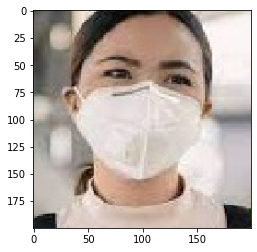

Person has a mask


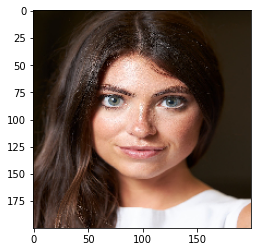

Person doesnt have a mask


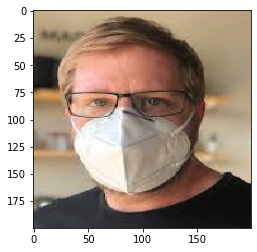

Person has a mask


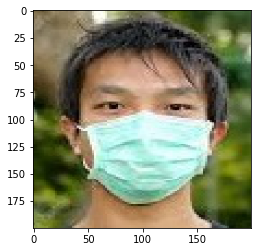

Person has a mask


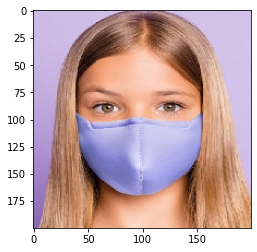

Person has a mask


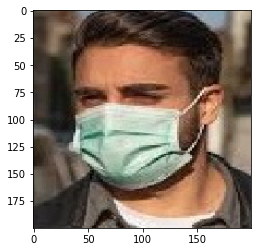

Person has a mask


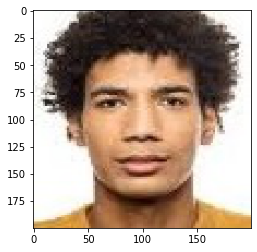

Person doesnt have a mask


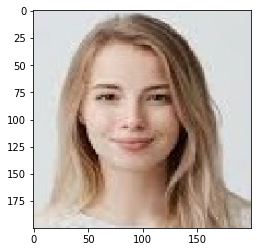

Person doesnt have a mask


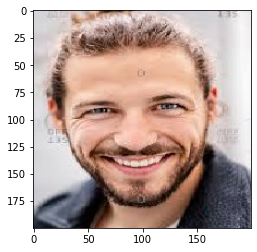

Person doesnt have a mask


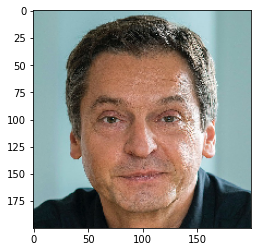

Person doesnt have a mask


In [11]:
directory_path = 'C:/Users/LENOVO/Desktop/Image_Recognition/test/'

for i in os.listdir(directory_path):
    img = image.load_img(directory_path + '//' + i, target_size = (200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis = 0)
    images = np.vstack([X])
    value  = model.predict(images)
    if value == 0:
        print('Person has a mask')
    else:
        print('Person doesnt have a mask')

## Summary

Accuracy on test data 100%